In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 

In [41]:
# Load tables
Edu = pd.read_excel('EducationLevel.xlsx')
Emp = pd.read_excel('Employee.xlsx')
Per = pd.read_excel('PerformanceRating.xlsx')
Rat = pd.read_excel('RatingLevel.xlsx')
Sat = pd.read_excel('SatisfiedLevel.xlsx')

Data Exploration

In [42]:
# 1. Get basic info and check for missing values
def explore_data(df, df_name):
    print(f"--- {df_name} ---")
    print("Shape:", df.shape)
    print("Columns:", df.columns)
    print("Missing values:\n", df.isnull().sum())
    print("Data types:\n", df.dtypes)
    print("Sample data:\n", df.head(), "\n")
    print('===========================================================')
explore_data(Edu, "EducationLevel")
explore_data(Emp, "Employee")
explore_data(Per, "PerformanceRating")
explore_data(Rat, "RatingLevel")
explore_data(Sat, "SatisfiedLevel")

--- EducationLevel ---
Shape: (5, 2)
Columns: Index(['EducationLevelID', 'EducationLevel'], dtype='object')
Missing values:
 EducationLevelID    0
EducationLevel      0
dtype: int64
Data types:
 EducationLevelID     int64
EducationLevel      object
dtype: object
Sample data:
    EducationLevelID            EducationLevel
0                 1  No Formal Qualifications
1                 2              High School 
2                 3                Bachelors 
3                 4                  Masters 
4                 5                 Doctorate 

--- Employee ---
Shape: (1470, 23)
Columns: Index(['EmployeeID', 'FirstName', 'LastName', 'Gender', 'Age',
       'BusinessTravel', 'Department', 'DistanceFromHome (KM)', 'State',
       'Ethnicity', 'Education', 'EducationField', 'JobRole', 'MaritalStatus',
       'Salary', 'StockOptionLevel', 'OverTime', 'HireDate', 'Attrition',
       'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
   

Get summary statistics

In [43]:
def summary_statistics(df, df_name):
    print(f"--- Summary Statistics for {df_name} ---")
    print(df.describe())
summary_statistics(Emp, "Employee")
summary_statistics(Per, "PerformanceRating")

--- Summary Statistics for Employee ---
               Age  DistanceFromHome (KM)    Education         Salary  \
count  1470.000000            1470.000000  1470.000000    1470.000000   
mean     28.989796              22.502721     2.912925  112956.497959   
min      18.000000               1.000000     1.000000   20387.000000   
25%      23.000000              12.000000     2.000000   43580.500000   
50%      26.000000              22.000000     3.000000   71199.500000   
75%      34.000000              33.000000     4.000000  142055.750000   
max      51.000000              45.000000     5.000000  547204.000000   
std       7.993055              12.811124     1.024165  103342.889222   

       StockOptionLevel                       HireDate  YearsAtCompany  \
count       1470.000000                           1470     1470.000000   
mean           0.793878  2017-07-05 14:50:31.836734720        4.562585   
min            0.000000            2012-01-03 00:00:00        0.000000   
25%   

Data Cleaning

In [44]:
def correct_data_types(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            try:
                df[column] = pd.to_numeric(df[column])
            except ValueError:
                df[column] = df[column].astype('category')
        
        if 'date' in column.lower() or 'time' in column.lower():
            try:
                df[column] = pd.to_datetime(df[column])
            except ValueError:
                pass  
    return df

Edu_clean = correct_data_types(Edu)
Emp_clean = correct_data_types(Emp)
Per_clean = correct_data_types(Per)
Rat_clean = correct_data_types(Rat)
Sat_clean = correct_data_types(Sat)

print("Employee Table Data Types:\n", Emp_clean.dtypes)
print('=====================================================')
print("Education Table Data Types:\n", Edu_clean.dtypes)
print('=====================================================')
print("Performance Table Data Types:\n", Per_clean.dtypes)
print('=====================================================')
print("Rating Table Data Types:\n", Rat_clean.dtypes)
print('=====================================================')
print("Satisfaction Table Data Types:\n", Sat_clean.dtypes)

Employee Table Data Types:
 EmployeeID                       category
FirstName                        category
LastName                         category
Gender                           category
Age                                 int64
BusinessTravel                   category
Department                       category
DistanceFromHome (KM)               int64
State                            category
Ethnicity                        category
Education                           int64
EducationField                   category
JobRole                          category
MaritalStatus                    category
Salary                              int64
StockOptionLevel                    int64
OverTime                         category
HireDate                   datetime64[ns]
Attrition                        category
YearsAtCompany                      int64
YearsInMostRecentRole               int64
YearsSinceLastPromotion             int64
YearsWithCurrManager                int64
dtype:

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_5864\2959695375.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column] = pd.to_datetime(df[column])


Handling Missing Values

In [45]:
def clean_missing_data(df, strategy='drop', fill_value=None):
    if strategy == 'drop':
        return df.dropna()
    elif strategy == 'fill':
        return df.fillna(fill_value)
    else:
        return df

Edu_clean = clean_missing_data(Edu, strategy='drop')
Emp_clean = clean_missing_data(Emp, strategy='drop')
Per_clean = clean_missing_data(Per, strategy='drop')
Rat_clean = clean_missing_data(Rat, strategy='drop')
Sat_clean = clean_missing_data(Sat, strategy='drop')

Removing Duplicates

In [46]:
def remove_duplicates(df, df_name):
    initial_shape = df.shape
    df_cleaned = df.drop_duplicates()
    final_shape = df_cleaned.shape
    print(f"Removed {initial_shape[0] - final_shape[0]} duplicates from {df_name}")
    return df_cleaned

Edu_clean = remove_duplicates(Edu_clean, "EducationLevel")
Emp_clean = remove_duplicates(Emp_clean, "Employee")
Per_clean = remove_duplicates(Per_clean, "PerformanceRating")
Rat_clean = remove_duplicates(Rat_clean, "RatingLevel")
Sat_clean = remove_duplicates(Sat_clean, "SatisfiedLevel")

Removed 0 duplicates from EducationLevel
Removed 0 duplicates from Employee
Removed 0 duplicates from PerformanceRating
Removed 0 duplicates from RatingLevel
Removed 0 duplicates from SatisfiedLevel


Count of all employees & Gender distribution

In [47]:
total_employees = Emp_clean['EmployeeID'].nunique()
print(f"Total Employees: {total_employees}")
gender_counts = Emp_clean['Gender'].value_counts()
gender_percentage = Emp_clean['Gender'].value_counts(normalize=True) * 100
print("Gender Counts:\n", gender_counts)
print("Gender Percentage:\n", gender_percentage)

Total Employees: 1470
Gender Counts:
 Gender
Female               675
Male                 651
Non-Binary           124
Prefer Not To Say     20
Name: count, dtype: int64
Gender Percentage:
 Gender
Female               45.918367
Male                 44.285714
Non-Binary            8.435374
Prefer Not To Say     1.360544
Name: proportion, dtype: float64


Number Of Employee By State

In [48]:
employees_by_state = Emp_clean.groupby('State')['EmployeeID'].count()
print("Number of Employees by State:\n", employees_by_state)

Number of Employees by State:
 State
CA    875
IL    176
NY    419
Name: EmployeeID, dtype: int64


C:\Users\Ahmed\AppData\Local\Temp\ipykernel_5864\191795677.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  employees_by_state = Emp_clean.groupby('State')['EmployeeID'].count()


Count of all employees & Age distribution

In [49]:
age_bins = [18, 26, 36, 46, 52]

age_labels = ['Early Career / Young Adults (18-25)', 
                  'Emerging Professionals (26-35)', 
                  'Mid-Career (36-45)', 
                  'Senior Professionals (46-51)']
Emp['AgeGroup'] = pd.cut(Emp['Age'], bins=age_bins, labels=age_labels, right=False)

age_distribution = Emp['AgeGroup'].value_counts().sort_index()

age_distribution


AgeGroup
Early Career / Young Adults (18-25)    650
Emerging Professionals (26-35)         497
Mid-Career (36-45)                     252
Senior Professionals (46-51)            71
Name: count, dtype: int64

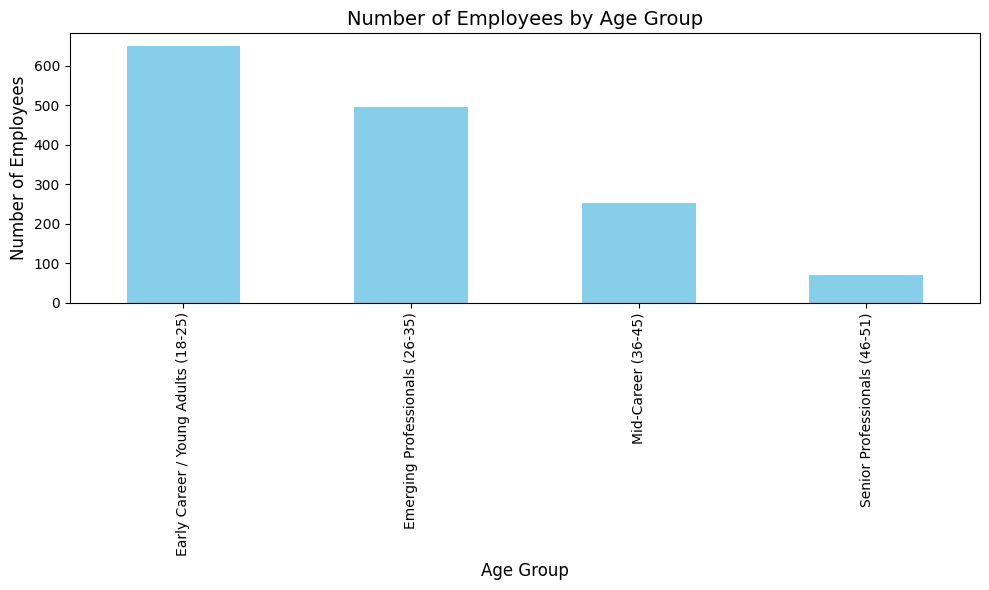

In [50]:
plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', color='skyblue')

plt.title('Number of Employees by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)

plt.tight_layout()
plt.show()

The 5 Job Roles By State

In [51]:
employees_by_state_jobrole = Emp_clean.groupby(['State', 'JobRole'])['EmployeeID'].count().reset_index()
employees_by_state_jobrole.rename(columns={'EmployeeID': 'Count'}, inplace=True)
top_job_roles = (employees_by_state_jobrole
                 .sort_values(['State', 'Count'], ascending=[True, False])
                 .groupby('State')
                 .head(5))
print("Top 5 Job Roles by State:\n", top_job_roles)

Top 5 Job Roles by State:
    State                    JobRole  Count
9     CA            Sales Executive    188
12    CA          Software Engineer    172
1     CA             Data Scientist    162
6     CA  Machine Learning Engineer     86
11    CA   Senior Software Engineer     78
22    IL            Sales Executive     41
14    IL             Data Scientist     32
25    IL          Software Engineer     31
24    IL   Senior Software Engineer     21
19    IL  Machine Learning Engineer     16
35    NY            Sales Executive     98
38    NY          Software Engineer     91
27    NY             Data Scientist     67
32    NY  Machine Learning Engineer     44
37    NY   Senior Software Engineer     33


C:\Users\Ahmed\AppData\Local\Temp\ipykernel_5864\2989621810.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  employees_by_state_jobrole = Emp_clean.groupby(['State', 'JobRole'])['EmployeeID'].count().reset_index()
C:\Users\Ahmed\AppData\Local\Temp\ipykernel_5864\2989621810.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('State')


Number Of Attrition By State

In [52]:
attrition_counts = Emp_clean[Emp_clean['Attrition'] == 'Yes'].groupby('State')['EmployeeID'].count()
attrition_counts.rename("Attrition Count", inplace=True)
print("Number of Attrition Cases by State:\n", attrition_counts)

Number of Attrition Cases by State:
 State
CA    153
IL     26
NY     58
Name: Attrition Count, dtype: int64


C:\Users\Ahmed\AppData\Local\Temp\ipykernel_5864\2585244529.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_counts = Emp_clean[Emp_clean['Attrition'] == 'Yes'].groupby('State')['EmployeeID'].count()


Filter the dataset for job satisfaction greater than 3

In [53]:
df = Per.sort_values(by=['EmployeeID','ReviewDate'], ascending =[ True,False ])
unique_df=Per.drop_duplicates(subset='EmployeeID',keep='first')
filtered_df = df[df['JobSatisfaction'] > 3]

filtered_df.head()

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
5743,PR6165,005C-E0FB,2022-06-17,3,4,5,3,0,4,4,4
4528,PR5070,005C-E0FB,2021-06-17,4,4,5,1,1,5,3,3
5745,PR6167,00A3-2445,2022-06-18,4,5,5,1,2,4,4,4
3415,PR4068,00A3-2445,2020-06-18,5,4,2,3,0,2,3,2
2416,PR3168,00A3-2445,2019-06-19,4,5,3,1,1,3,5,5


In [54]:
df2 = Per.sort_values(by=['EmployeeID', 'ReviewDate'], ascending=[True, False])
df2_last_rating = df2.drop_duplicates(subset=['EmployeeID'], keep='first')
df_merged = pd.merge(Emp, df2_last_rating[['EmployeeID', 'JobSatisfaction']], on='EmployeeID', how='left')
df_merged

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup,JobSatisfaction
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,1,No,2012-01-03,No,10,4,9,7,Emerging Professionals (26-35),2.0
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,0,Yes,2012-01-04,No,10,6,10,0,Mid-Career (36-45),4.0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,1,No,2012-01-04,No,10,6,10,8,Mid-Career (36-45),5.0
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,0,No,2012-01-05,No,10,10,10,0,Mid-Career (36-45),4.0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,0,No,2012-01-05,Yes,6,1,1,6,Emerging Professionals (26-35),4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,467E-977A,Jud,Melanaphy,Male,20,Some Travel,Technology,28,CA,Black or African American,...,0,No,2022-12-26,No,0,0,0,0,Early Career / Young Adults (18-25),NaN
1466,6FB9-A624,Marc,Calver,Non-Binary,27,Some Travel,Technology,8,CA,Black or African American,...,3,No,2022-12-30,No,0,0,0,0,Emerging Professionals (26-35),NaN
1467,EBF4-5928,Rudolph,MacDearmont,Male,21,Some Travel,Sales,4,CA,Black or African American,...,0,No,2022-12-30,No,0,0,0,0,Early Career / Young Adults (18-25),NaN
1468,60E6-B1D9,Merill,Agg,Male,21,Some Travel,Technology,7,CA,Black or African American,...,0,No,2022-12-30,No,0,0,0,0,Early Career / Young Adults (18-25),NaN


In [55]:
merged_df = pd.merge(Emp[['EmployeeID', 'AgeGroup']], df2_last_rating[['EmployeeID', 'JobSatisfaction']], on='EmployeeID', how='left')
pivot_table = pd.pivot_table(merged_df, values='EmployeeID', index='AgeGroup', columns='JobSatisfaction', aggfunc='count', fill_value=0)

pivot_table

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_5864\1119918520.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(merged_df, values='EmployeeID', index='AgeGroup', columns='JobSatisfaction', aggfunc='count', fill_value=0)


JobSatisfaction,1.0,2.0,3.0,4.0,5.0
AgeGroup,,,,,
Early Career / Young Adults (18-25),22,121,133,133,111
Emerging Professionals (26-35),15,102,122,124,92
Mid-Career (36-45),8,58,63,67,44
Senior Professionals (46-51),1,19,19,12,14


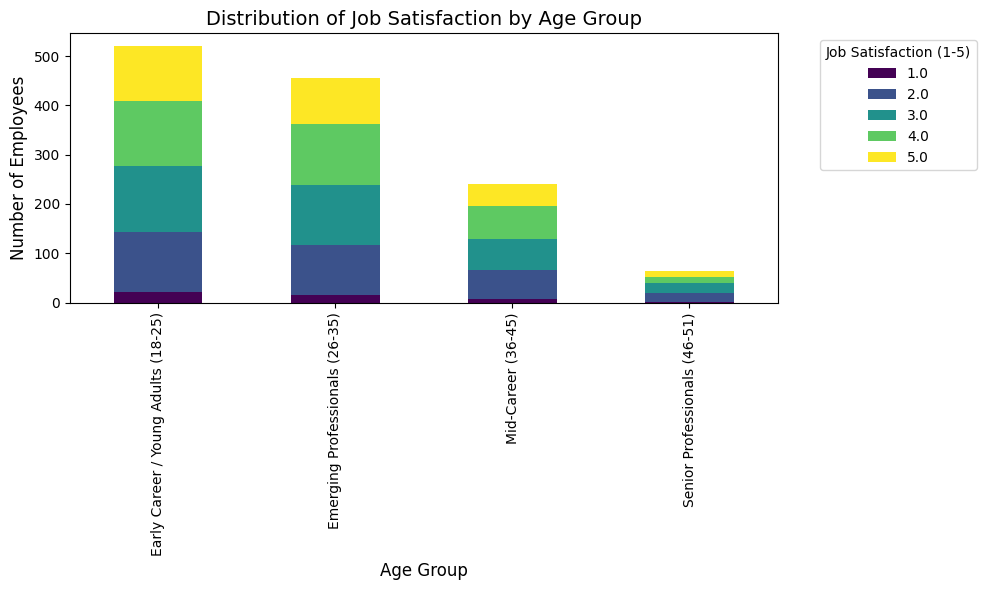

In [56]:
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    
plt.title('Distribution of Job Satisfaction by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.legend(title='Job Satisfaction (1-5)', bbox_to_anchor=(1.05, 1), loc='upper left')
    
plt.tight_layout()
plt.show()

Count Of The Most Job Role For Each Age Group

In [57]:
df2_filtered = df2_last_rating[df2_last_rating['JobSatisfaction'].isin([4, 5])]    
merged_df = pd.merge(Emp[['EmployeeID', 'AgeGroup', 'JobRole']], df2_filtered[['EmployeeID']], on='EmployeeID', how='inner')
job_role_counts = merged_df.groupby(['AgeGroup', 'JobRole']).size().reset_index(name='Count')
most_common_job_role = job_role_counts.loc[job_role_counts.groupby('AgeGroup')['Count'].idxmax()]
most_common_job_role

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_5864\3770853838.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  job_role_counts = merged_df.groupby(['AgeGroup', 'JobRole']).size().reset_index(name='Count')
C:\Users\Ahmed\AppData\Local\Temp\ipykernel_5864\3770853838.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_common_job_role = job_role_counts.loc[job_role_counts.groupby('AgeGroup')['Count'].idxmax()]


,AgeGroup,JobRole,Count
1,Early Career / Young Adults (18-25),Data Scientist,57
22,Emerging Professionals (26-35),Sales Executive,54
35,Mid-Career (36-45),Sales Executive,24
48,Senior Professionals (46-51),Sales Executive,9


In [58]:
def classify_category(age):
    if 18 <= age <= 25:
        return 'Early Career'
    elif 26 <= age < 35:
        return 'Emerging Professionals'
    elif 36 <= age <= 45:
        return 'Mid-Career'
    else:
        return 'Senior Professionalsr'

def classify_degree(age):
    if 1 == age:
        return 'No Formal Qualifications'
    elif 2 == age:
        return 'High School'
    elif 3 == age:
        return 'Bachelors'
    elif 4 == age:
        return 'Masters'
    else:
        return 'Doctorate'

def classify_Rating(age):
    if 1 == age:
        return 'Unacceptable'
    elif 2 == age:
        return 'Needs Improvement'
    elif 3 == age:
        return 'Meets Expectation'
    elif 4 == age:
        return 'Exceeds Expectation'
    else:
        return 'Above and Beyond'

def classify_satisfication(age):
    if 1 == age:
        return 'Very Dissatisfied'
    elif 2 == age:
        return 'Dissatisfied'
    elif 3 == age:
        return 'Neutral'
    elif 4 == age:
        return 'Satisfied'
    else:
        return 'Very Satisfied'

def classify_distance(age):
    if age<15:
        return 'Small Distance'
    elif age<30:
        return 'Medium Distance'
    else:
        return 'Long Satisfied'

In [59]:
result=pd.merge(Emp,Per,on='EmployeeID',how='inner')
result['SelfRating']=result['SelfRating'].apply(classify_Rating)
result['category'] = result['Age'].apply(classify_category)
result['Education']=result['Education'].apply(classify_degree)
result['ManagerRating']=result['ManagerRating'].apply(classify_Rating)
result['EnvironmentSatisfaction']=result['EnvironmentSatisfaction'].apply(classify_satisfication)
result['JobSatisfaction']=result['JobSatisfaction'].apply(classify_satisfication)
result['RelationshipSatisfaction']=result['RelationshipSatisfaction'].apply(classify_satisfication)
Emp['Distance_Category']=Emp['DistanceFromHome (KM)'].apply(classify_distance)

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_5864\3282098177.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result4 = Emp.groupby(['State'])['DistanceFromHome (KM)'].mean()
C:\Users\Ahmed\AppData\Local\Temp\ipykernel_5864\3282098177.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result5 = Emp.groupby(['State'])['EmployeeID'].count()
C:\Users\Ahmed\AppData\Local\Temp\ipykernel_5864\3282098177.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future de

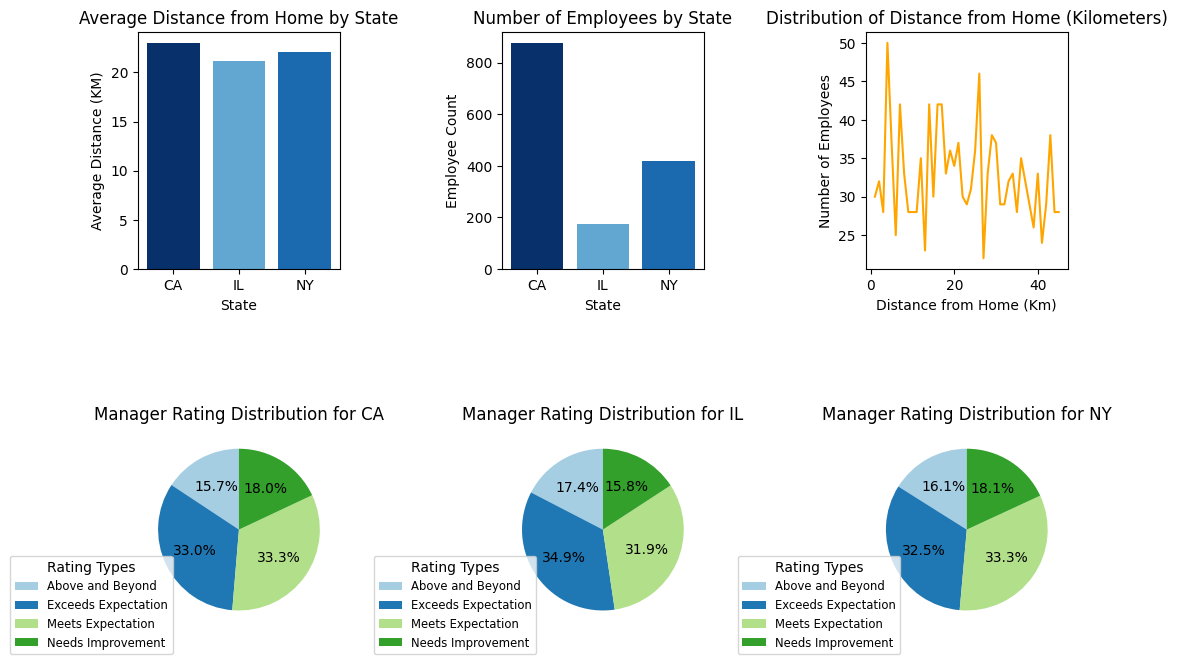

<Figure size 1000x600 with 0 Axes>

In [60]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Mean distance from home for each state
result4 = Emp.groupby(['State'])['DistanceFromHome (KM)'].mean()
norm = mpl.colors.Normalize(vmin=(result4.values.min()-2), vmax=result4.values.max())
cmap = plt.cm.Blues
colors = cmap(norm(result4.values))
axs[0,0].bar(result4.index, result4.values, color=colors)
axs[0,0].set_title('Average Distance from Home by State')
axs[0,0].set_xlabel('State')
axs[0,0].set_ylabel('Average Distance (KM)')


result5 = Emp.groupby(['State'])['EmployeeID'].count()
plt.figure(figsize=(10, 6))
norm = mpl.colors.Normalize(vmin=(result5.values.min()-2), vmax=result5.values.max())
cmap = plt.cm.Blues
axs[0,1].bar(result5.index, result5.values, color=colors)
axs[0,1].set_title('Number of Employees by State')
axs[0,1].set_xlabel('State')
axs[0,1].set_ylabel('Employee Count')


# Group by DistanceFromHome and get the count of employees at each distance
distance_count = Emp['DistanceFromHome (KM)'].value_counts().sort_index()
norm = plt.Normalize(distance_count.values.min(), distance_count.values.max())
colors = plt.cm.Blues(norm(distance_count.values))  
axs[0,2].plot(distance_count.index, distance_count.values, color='orange', label="Line Plot")
axs[0,2].set_title('Distribution of Distance from Home (Kilometers)')
axs[0,2].set_xlabel('Distance from Home (Km)')
axs[0,2].set_ylabel('Number of Employees')


grouped_data = result.groupby(['State', 'ManagerRating']).size().unstack().fillna(0)
# Create pie charts for each state
for i, state in enumerate(grouped_data.index):
    axs[1,i].pie(grouped_data.loc[state],  autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    axs[1,i].set_title(f'Manager Rating Distribution for {state}')
    axs[1,i].legend( grouped_data.columns, title="Rating Types", loc="best",
     bbox_to_anchor=(0.2,0.4 ),fontsize='small')
    

plt.tight_layout()
fig.subplots_adjust(hspace=0.6 , wspace=0.8)
plt.show()